<a href="https://colab.research.google.com/github/hongqin/R-covid19-bootcamp-2020Dec/blob/main/R_coding_bootcamp_2020Dec19_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First, please make a copy to your own Google Drive. 
**Please make a copy of this code in your CoLab in order to modify and run the code.** <br> 
You can do this by select "File" -> "Save a copy in Drive"
## New Section
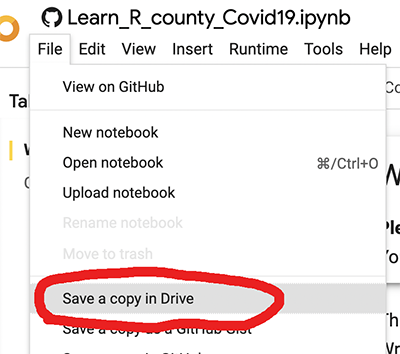



---



This is a short tutorial on using R to explore Covid19 data using Google CoLab <br>
Written by Hong Qin <br>
This version is modifed for a high-school coding bootcamp on Dec 19-23, 2020.

This is a work in progress and is for educational purpose only. 

This is code can be cloned from
https://github.com/hongqin/Use-R-in-CoLab/blob/master/Learn_R_UALR_CoLab.ipynb

More tutorials at http://YouTube.com/hongqin

# Prepartion 1. Get familiar with Google CoLab

## The 'Code' and 'Text' cells
The code cell can be run by click the play icon on the upper-left corner of the code cells.

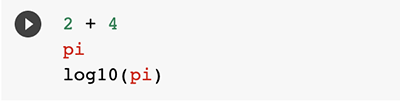

The menu on the top


## File, Edit, Insert, Runtime, Tools

## Table of contents and the left-sided panel

# Preparation 2. The COVID19 open data


A popular source for reporting COVID cases is the site built by researchers at the John Hopkins University (JHU). This JHU data set is publically available and will be used in our study. 

There are many other COVID19 data set, see
https://en.wikipedia.org/wiki/COVID-19_datasets


# Chapter 1. Basics of R coding

## What is R? 
It is a popular language for data analysis. See

https://en.wikipedia.org/wiki/R_(programming_language) 

There are many books on how to use R. This exercise is only meant to show some basics of R to you.

## Simple calculation

In [364]:
2 + 4
pi
log10(pi)

[1] 6

[1] 3.141593

[1] 0.4971499

In [365]:
2*4
9/3
9-7

[1] 8

[1] 3

[1] 2

## Use variables

The = sign means assignment in R and many other programming languages.

In [366]:
x = 2
y = 3
z = x  + 6
z

[1] 8

## The # sign means comments (not code)

In [367]:
# This is a comment
x = 2 #This is also a comment

## A list of numbers is called a Vector in R

In [368]:
a_vector = c(1, 3.14159, 5.0, -1, 10) # c( ) is the syntax for defining a vector 
a_vector

[1]  1.00000  3.14159  5.00000 -1.00000 10.00000

In [369]:
b_vector= a_vector + c(2, 0.5, -5, 1, -10)
b_vector

[1] 3.00000 3.64159 0.00000 0.00000 0.00000

## Vectors can be indexed. 


In [370]:
a_vector = 4:20 #The colon sign is a symbol mean from 4 to 20
a_vector

[1]  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20

In [371]:
a_vector[1] #first element of the vector

[1] 4

In [372]:
a_vector[5]

[1] 8

### **Question**: How to find the 9-th element? 

## Functions in R uses smooth parentheses

A function that generates a list of numbers from 4 to 100 with a step of 2

In [373]:
seq(4, 100, 2) 

[1]   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34  36  38  40
[20]  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70  72  74  76  78
[39]  80  82  84  86  88  90  92  94  96  98 100

The function rnorm() generate random number based on Gaussian distribution


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-26.2227  -5.8142   0.0488   5.3059  23.5183 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)   0.7694     0.9174   0.839    0.404
x             0.8138     0.8896   0.915    0.363

Residual standard error: 9.107 on 98 degrees of freedom
Multiple R-squared:  0.008467,	Adjusted R-squared:  -0.001651 
F-statistic: 0.8369 on 1 and 98 DF,  p-value: 0.3625


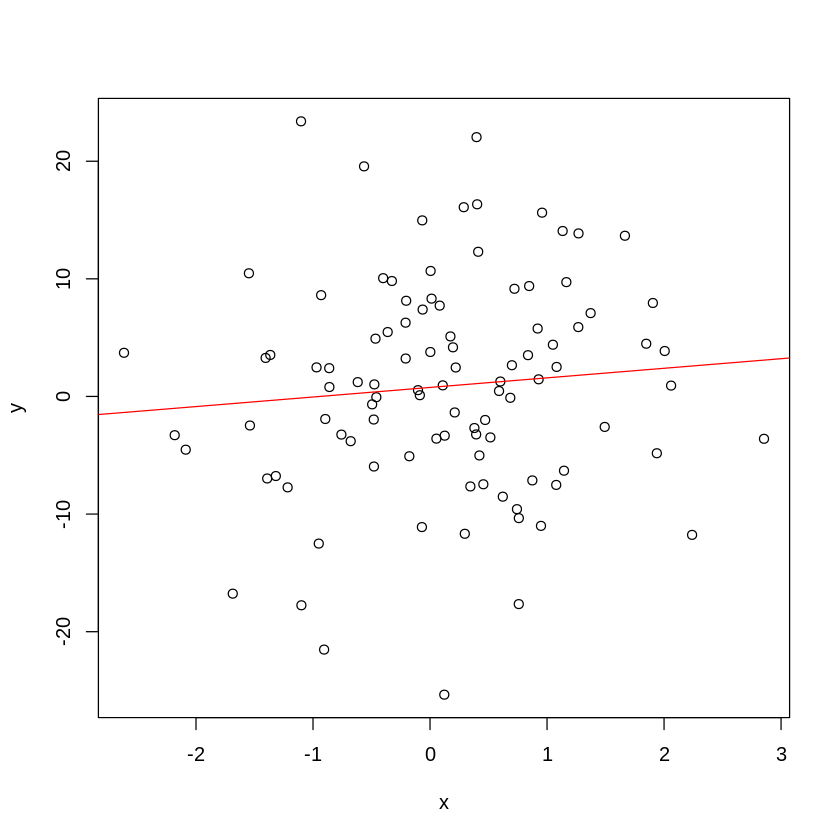

In [374]:
x = rnorm(100) #generate 100 normal-distributed (Gaussain) random nubmers 
y = x + rnorm(100)*10 # y is a linear transformation of x with some Gaussain noise
m = lm( y ~ x)
plot( y ~ x)
abline(m, col='red')
summary(m)

## Looking for helps. 
This can be done by a question mark or help(). 

In [375]:
?rnorm

In [376]:
?lm

In [377]:
?abline

In [378]:
help(seq)

## Load Libraries
Libraries are software tools developed by many people around the world.

In [326]:
library(tidyverse)
library(dplyr)

## Dataframe - the spreadsheet in R
Dataframe is a basic tool to handle data in R, in some ways like a spreadsheet in Microsoft Excel.

Now, let's load a small demo spreadsheet from a website

In [327]:
tb = read_csv("https://raw.githubusercontent.com/hongqin/Use-R-in-CoLab/master/vip-grades.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  name = col_character(),
  GPA = col_double(),
  Major = col_character(),
  College = col_character()
)




In [328]:
tb #look at the small table. Not a good idea for large table

name,GPA,Major,College
<chr>,<dbl>,<chr>,<chr>
George Washington,4.0,Biology,ArtsScience
John Adams,3.5,Computer_Science,Engineering
Thomas Jefferson,3.9,Physics,ArtsScience
James Madison,4.0,Mathematics,ArtsScience
James Monroe,3.2,Economics,Business
Andrew Jackson,3.1,Chemistry,ArtsScience
James K. Polk,3.7,Data_Science,Engineering
Zachary Taylor,2.9,Environmental_Science,ArtsScience
Millard Fillmore,4.0,Biology,ArtsScience


In [329]:
head(tb) #look at just a few row of the table

name,GPA,Major,College
<chr>,<dbl>,<chr>,<chr>
George Washington,4.0,Biology,ArtsScience
John Adams,3.5,Computer_Science,Engineering
Thomas Jefferson,3.9,Physics,ArtsScience
James Madison,4.0,Mathematics,ArtsScience
James Monroe,3.2,Economics,Business
Andrew Jackson,3.1,Chemistry,ArtsScience


### pick rows and columns using indices

In [330]:
tb[1,] #first row

name,GPA,Major,College
<chr>,<dbl>,<chr>,<chr>
George Washington,4,Biology,ArtsScience


In [331]:
tb[, 2] #second column

GPA
<dbl>
4.0
3.5
3.9
4.0
3.2
3.1
3.7
2.9
4.0


In [332]:
tb[c(1,5,9), 1:2] # the 1st, 5th, and 9th rows, two columns

name,GPA
<chr>,<dbl>
George Washington,4.0
James Monroe,3.2
Millard Fillmore,4.0


In [333]:
tb

name,GPA,Major,College
<chr>,<dbl>,<chr>,<chr>
George Washington,4.0,Biology,ArtsScience
John Adams,3.5,Computer_Science,Engineering
Thomas Jefferson,3.9,Physics,ArtsScience
James Madison,4.0,Mathematics,ArtsScience
James Monroe,3.2,Economics,Business
Andrew Jackson,3.1,Chemistry,ArtsScience
James K. Polk,3.7,Data_Science,Engineering
Zachary Taylor,2.9,Environmental_Science,ArtsScience
Millard Fillmore,4.0,Biology,ArtsScience


### Pick a colum with $ or index

In [334]:
tb$Grade

Warning message:
“Unknown or uninitialised column: `Grade`.”


NULL

In [335]:
tb[, 2]

GPA
<dbl>
4.0
3.5
3.9
4.0
3.2
3.1
3.7
2.9
4.0


### Pick a row 

In [336]:
tb[1,]

name,GPA,Major,College
<chr>,<dbl>,<chr>,<chr>
George Washington,4,Biology,ArtsScience


### use fancy tidyverse

In [337]:
tb %>% dplyr::select( name, GPA )  %>% filter (GPA >= 3.0)

name,GPA
<chr>,<dbl>
George Washington,4.0
John Adams,3.5
Thomas Jefferson,3.9
James Madison,4.0
James Monroe,3.2
Andrew Jackson,3.1
James K. Polk,3.7
Millard Fillmore,4.0
Franklin Pierce,3.8


In [338]:
tb %>% dplyr::select( College ) %>% distinct

College
<chr>
ArtsScience
Engineering
Business


In [339]:
tb %>% dplyr::filter (College == "ArtsScience")


name,GPA,Major,College
<chr>,<dbl>,<chr>,<chr>
George Washington,4.0,Biology,ArtsScience
Thomas Jefferson,3.9,Physics,ArtsScience
James Madison,4.0,Mathematics,ArtsScience
Andrew Jackson,3.1,Chemistry,ArtsScience
Zachary Taylor,2.9,Environmental_Science,ArtsScience
Millard Fillmore,4.0,Biology,ArtsScience
Ulysses S. Grant,2.9,Political_Science,ArtsScience
Rutherford B. Hayes,3.0,Psychology,ArtsScience
James Garfield,3.2,Philosophy,ArtsScience


In [340]:
tb %>% dplyr::filter (College == "Engineering")

name,GPA,Major,College
<chr>,<dbl>,<chr>,<chr>
John Adams,3.5,Computer_Science,Engineering
James K. Polk,3.7,Data_Science,Engineering
Franklin Pierce,3.8,Computer_Engineering,Engineering
James Buchanan,3.7,Electronic_Engineering,Engineering
Abraham Lincoln,3.6,Chemical_Engineering,Engineering
Chester A. Arthur,3.5,Computer_Science,Engineering
William McKinley,2.9,Computer_Science,Engineering
Herbert Hoover,3.6,Data_Science,Engineering
Franklin D. Roosevelt,3.9,Computer_Science,Engineering


### Question: Are GPA different between VIP students in Egnineering versus Art and Science? 

We can do a t-test. 

In [341]:
tbEng = tb %>% dplyr::filter (College == "Engineering") 
tbAS = tb %>% dplyr:: filter (College == "ArtsScience")
t.test( tbEng$GPA, tbAS$GPA) # a t-test


	Welch Two Sample t-test

data:  tbEng$GPA and tbAS$GPA
t = 0.59723, df = 23.457, p-value = 0.5561
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2202747  0.3993597
sample estimates:
mean of x mean of y 
 3.577778  3.488235 


Generally, a p-value larger than 0.05 means no significant difference in the statistical sense. 

For more information on p-value, see 
https://en.wikipedia.org/wiki/P-value

# Chapter 2, Explore the USA county-level COVID19 case data


We will go through the COVID19 case data set and learn more R on the way. 



First, install and load some necessary packages

In [401]:
install.packages('reshape2')
library(tidyverse)
library(lubridate)
library(reshape2)
library(ggplot2)
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Load the COVID19 data into a dataframe

In [402]:
# load JHU covid19 data set with tidyverse read_csv
# this is the URL for "view raw " for csv files on GitHub
tb = read_csv(url("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"))



── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  iso2 = col_character(),
  iso3 = col_character(),
  Admin2 = col_character(),
  Province_State = col_character(),
  Country_Region = col_character(),
  Combined_Key = col_character()
)
ℹ Use `spec()` for the full column specifications.




In [403]:
head(tb)

UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,⋯,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
84001001,US,USA,840,1001,Autauga,Alabama,US,32.53953,-86.64408,⋯,3005,3043,3087,3117,3186,3233,3258,3300,3329,3426
84001003,US,USA,840,1003,Baldwin,Alabama,US,30.72775,-87.72207,⋯,9728,9821,9974,10087,10288,10489,10665,10806,10898,11061
84001005,US,USA,840,1005,Barbour,Alabama,US,31.86826,-85.38713,⋯,1223,1224,1240,1245,1258,1264,1269,1272,1275,1292
84001007,US,USA,840,1007,Bibb,Alabama,US,32.99642,-87.12511,⋯,1293,1299,1317,1322,1359,1398,1417,1441,1455,1504
84001009,US,USA,840,1009,Blount,Alabama,US,33.98211,-86.56791,⋯,3299,3324,3426,3496,3600,3663,3744,3776,3803,3881
84001011,US,USA,840,1011,Bullock,Alabama,US,32.10031,-85.71266,⋯,713,714,719,722,722,723,725,728,728,733


## Pick rows, columns, and cells in DataFrames

A a_ij


In [404]:
# pick first row, second colum
tb[1,2] 

# pick 4th row, 5th colum. Notice that R starts with 1, not zero like Python
tb[4, 5]

iso2
<chr>
US


FIPS
<dbl>
1007


In [405]:
# pick first column and  first 10 rows
tb[ 1:10, 1]

UID
<dbl>
84001001
84001003
84001005
84001007
84001009
84001011
84001013
84001015
84001017


In [406]:
# pick 6-7th rows, 4-8 colums
tb[ 6:7, 4:8]

code3,FIPS,Admin2,Province_State,Country_Region
<dbl>,<dbl>,<chr>,<chr>,<chr>
840,1011,Bullock,Alabama,US
840,1013,Butler,Alabama,US


In [407]:
# The daily cases data started on the 12th column
tb[ 1:5, 1:12]

UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
84001001,US,USA,840,1001,Autauga,Alabama,US,32.53953,-86.64408,"Autauga, Alabama, US",0
84001003,US,USA,840,1003,Baldwin,Alabama,US,30.72775,-87.72207,"Baldwin, Alabama, US",0
84001005,US,USA,840,1005,Barbour,Alabama,US,31.86826,-85.38713,"Barbour, Alabama, US",0
84001007,US,USA,840,1007,Bibb,Alabama,US,32.99642,-87.12511,"Bibb, Alabama, US",0
84001009,US,USA,840,1009,Blount,Alabama,US,33.98211,-86.56791,"Blount, Alabama, US",0


In [408]:
?length

In [409]:
# how many columns? 
length(tb[1,])
print(paste( "There are ", length(tb[1,]), " columns"))

[1] 340

[1] "There are  340  columns"


In [410]:
# view the first 5 rows in all data columns
tb[1:5 , 12: length(tb[1,])  ]

1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,⋯,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,0,0,0,0,0,⋯,3005,3043,3087,3117,3186,3233,3258,3300,3329,3426
0,0,0,0,0,0,0,0,0,0,⋯,9728,9821,9974,10087,10288,10489,10665,10806,10898,11061
0,0,0,0,0,0,0,0,0,0,⋯,1223,1224,1240,1245,1258,1264,1269,1272,1275,1292
0,0,0,0,0,0,0,0,0,0,⋯,1293,1299,1317,1322,1359,1398,1417,1441,1455,1504
0,0,0,0,0,0,0,0,0,0,⋯,3299,3324,3426,3496,3600,3663,3744,3776,3803,3881


## Select columns of daily cases

select the all columns of actual data, from the 12 th column to the last column.

In [411]:
tb %>% dplyr::select( 12:length(tb[1,]) ) #It seems that CoLab often rquire explicit pakcage for function calls. 

1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,⋯,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,0,0,0,0,0,⋯,3005,3043,3087,3117,3186,3233,3258,3300,3329,3426
0,0,0,0,0,0,0,0,0,0,⋯,9728,9821,9974,10087,10288,10489,10665,10806,10898,11061
0,0,0,0,0,0,0,0,0,0,⋯,1223,1224,1240,1245,1258,1264,1269,1272,1275,1292
0,0,0,0,0,0,0,0,0,0,⋯,1293,1299,1317,1322,1359,1398,1417,1441,1455,1504
0,0,0,0,0,0,0,0,0,0,⋯,3299,3324,3426,3496,3600,3663,3744,3776,3803,3881
0,0,0,0,0,0,0,0,0,0,⋯,713,714,719,722,722,723,725,728,728,733
0,0,0,0,0,0,0,0,0,0,⋯,1236,1244,1257,1263,1287,1289,1306,1330,1340,1332
0,0,0,0,0,0,0,0,0,0,⋯,7096,7165,7300,7392,7534,7658,7760,7813,7872,7966
0,0,0,0,0,0,0,0,0,0,⋯,1906,1915,1945,1961,1977,1982,1997,2013,2022,2040


## Rotate the data so that data of each county is in one column

In [412]:
# We need save the data into a new variable 'tb1' so that computer can remember it
tb1 <- tb %>% dplyr::select(12:length(tb[1,])) %>% as.matrix()
tb1 = as.data.frame(t(tb1)) # t for transpose, then convert to a dataframe
tail(tb1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V3331,V3332,V3333,V3334,V3335,V3336,V3337,V3338,V3339,V3340
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
12/10/20,3186,10288,1258,1359,3600,722,1287,7534,1977,1149,⋯,1574,373,2267,534,2281,1852,1271,0,596,428
12/11/20,3233,10489,1264,1398,3663,723,1289,7658,1982,1167,⋯,1595,378,2290,536,2376,1868,1281,0,620,428
12/12/20,3258,10665,1269,1417,3744,725,1306,7760,1997,1187,⋯,1600,381,2293,539,2384,1886,1289,0,629,428
12/13/20,3300,10806,1272,1441,3776,728,1330,7813,2013,1197,⋯,1636,390,2323,540,2451,1905,1307,0,639,428
12/14/20,3329,10898,1275,1455,3803,728,1340,7872,2022,1204,⋯,1654,392,2345,544,2518,1930,1327,0,644,429
12/15/20,3426,11061,1292,1504,3881,733,1332,7966,2040,1213,⋯,1671,393,2350,548,2544,1940,1352,0,659,436


## Add meaning columns names

The Combined_Key are useful column names

In [413]:
names(tb1) = tb$Combined_Key
#tail(tb1[100:110,1:10])
tail(tb1[,1:10])


,"Autauga, Alabama, US","Baldwin, Alabama, US","Barbour, Alabama, US","Bibb, Alabama, US","Blount, Alabama, US","Bullock, Alabama, US","Butler, Alabama, US","Calhoun, Alabama, US","Chambers, Alabama, US","Cherokee, Alabama, US"
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
12/10/20,3186,10288,1258,1359,3600,722,1287,7534,1977,1149
12/11/20,3233,10489,1264,1398,3663,723,1289,7658,1982,1167
12/12/20,3258,10665,1269,1417,3744,725,1306,7760,1997,1187
12/13/20,3300,10806,1272,1441,3776,728,1330,7813,2013,1197
12/14/20,3329,10898,1275,1455,3803,728,1340,7872,2022,1204
12/15/20,3426,11061,1292,1504,3881,733,1332,7966,2040,1213


## Convert dates from text format to actual Date type

see https://lubridate.tidyverse.org/ 

In [414]:
library(lubridate)
date("10/1/2020")

[1] "10-01-20"

In [415]:
current_dates = names(tb)[12:length(tb[1,])]
class(current_dates)
current_dates

[1] "character"

[1] "1/22/20"  "1/23/20"  "1/24/20"  "1/25/20"  "1/26/20"  "1/27/20" 
  [7] "1/28/20"  "1/29/20"  "1/30/20"  "1/31/20"  "2/1/20"   "2/2/20"  
 [13] "2/3/20"   "2/4/20"   "2/5/20"   "2/6/20"   "2/7/20"   "2/8/20"  
 [19] "2/9/20"   "2/10/20"  "2/11/20"  "2/12/20"  "2/13/20"  "2/14/20" 
 [25] "2/15/20"  "2/16/20"  "2/17/20"  "2/18/20"  "2/19/20"  "2/20/20" 
 [31] "2/21/20"  "2/22/20"  "2/23/20"  "2/24/20"  "2/25/20"  "2/26/20" 
 [37] "2/27/20"  "2/28/20"  "2/29/20"  "3/1/20"   "3/2/20"   "3/3/20"  
 [43] "3/4/20"   "3/5/20"   "3/6/20"   "3/7/20"   "3/8/20"   "3/9/20"  
 [49] "3/10/20"  "3/11/20"  "3/12/20"  "3/13/20"  "3/14/20"  "3/15/20" 
 [55] "3/16/20"  "3/17/20"  "3/18/20"  "3/19/20"  "3/20/20"  "3/21/20" 
 [61] "3/22/20"  "3/23/20"  "3/24/20"  "3/25/20"  "3/26/20"  "3/27/20" 
 [67] "3/28/20"  "3/29/20"  "3/30/20"  "3/31/20"  "4/1/20"   "4/2/20"  
 [73] "4/3/20"   "4/4/20"   "4/5/20"   "4/6/20"   "4/7/20"   "4/8/20"  
 [79] "4/9/20"   "4/10/20"  "4/11/20"  "4/12/20"  "4/13/20"  "4/14/20" 
 [85] "4/15/20"  "4/16/20"  "4/17/20"  "4/18/20"  "4/19/20"  "4/20/20" 
 [91] "4/21/20"  "4/22/20"  "4/23/20"  "4/24/20"  "4/25/20"  "4/26/20" 
 [97] "4/27/20"  "4/28/20"  "4/29/20"  "4/30/20"  "5/1/20"   "5/2/20"  
[103] "5/3/20"   "5/4/20"   "5/5/20"   "5/6/20"   "5/7/20"   "5/8/20"  
[109] "5/9/20"   "5/10/20"  "5/11/20"  "5/12/20"  "5/13/20"  "5/14/20" 
[115] "5/15/20"  "5/16/20"  "5/17/20"  "5/18/20"  "5/19/20"  "5/20/20" 
[121] "5/21/20"  "5/22/20"  "5/23/20"  "5/24/20"  "5/25/20"  "5/26/20" 
[127] "5/27/20"  "5/28/20"  "5/29/20"  "5/30/20"  "5/31/20"  "6/1/20"  
[133] "6/2/20"   "6/3/20"   "6/4/20"   "6/5/20"   "6/6/20"   "6/7/20"  
[139] "6/8/20"   "6/9/20"   "6/10/20"  "6/11/20"  "6/12/20"  "6/13/20" 
[145] "6/14/20"  "6/15/20"  "6/16/20"  "6/17/20"  "6/18/20"  "6/19/20" 
[151] "6/20/20"  "6/21/20"  "6/22/20"  "6/23/20"  "6/24/20"  "6/25/20" 
[157] "6/26/20"  "6/27/20"  "6/28/20"  "6/29/20"  "6/30/20"  "7/1/20"  
[163] "7/2/20"   "7/3/20"   "7/4/20"   "7/5/20"   "7/6/20"   "7/7/20"  
[169] "7/8/20"   "7/9/20"   "7/10/20"  "7/11/20"  "7/12/20"  "7/13/20" 
[175] "7/14/20"  "7/15/20"  "7/16/20"  "7/17/20"  "7/18/20"  "7/19/20" 
[181] "7/20/20"  "7/21/20"  "7/22/20"  "7/23/20"  "7/24/20"  "7/25/20" 
[187] "7/26/20"  "7/27/20"  "7/28/20"  "7/29/20"  "7/30/20"  "7/31/20" 
[193] "8/1/20"   "8/2/20"   "8/3/20"   "8/4/20"   "8/5/20"   "8/6/20"  
[199] "8/7/20"   "8/8/20"   "8/9/20"   "8/10/20"  "8/11/20"  "8/12/20" 
[205] "8/13/20"  "8/14/20"  "8/15/20"  "8/16/20"  "8/17/20"  "8/18/20" 
[211] "8/19/20"  "8/20/20"  "8/21/20"  "8/22/20"  "8/23/20"  "8/24/20" 
[217] "8/25/20"  "8/26/20"  "8/27/20"  "8/28/20"  "8/29/20"  "8/30/20" 
[223] "8/31/20"  "9/1/20"   "9/2/20"   "9/3/20"   "9/4/20"   "9/5/20"  
[229] "9/6/20"   "9/7/20"   "9/8/20"   "9/9/20"   "9/10/20"  "9/11/20" 
[235] "9/12/20"  "9/13/20"  "9/14/20"  "9/15/20"  "9/16/20"  "9/17/20" 
[241] "9/18/20"  "9/19/20"  "9/20/20"  "9/21/20"  "9/22/20"  "9/23/20" 
[247] "9/24/20"  "9/25/20"  "9/26/20"  "9/27/20"  "9/28/20"  "9/29/20" 
[253] "9/30/20"  "10/1/20"  "10/2/20"  "10/3/20"  "10/4/20"  "10/5/20" 
[259] "10/6/20"  "10/7/20"  "10/8/20"  "10/9/20"  "10/10/20" "10/11/20"
[265] "10/12/20" "10/13/20" "10/14/20" "10/15/20" "10/16/20" "10/17/20"
[271] "10/18/20" "10/19/20" "10/20/20" "10/21/20" "10/22/20" "10/23/20"
[277] "10/24/20" "10/25/20" "10/26/20" "10/27/20" "10/28/20" "10/29/20"
[283] "10/30/20" "10/31/20" "11/1/20"  "11/2/20"  "11/3/20"  "11/4/20" 
[289] "11/5/20"  "11/6/20"  "11/7/20"  "11/8/20"  "11/9/20"  "11/10/20"
[295] "11/11/20" "11/12/20" "11/13/20" "11/14/20" "11/15/20" "11/16/20"
[301] "11/17/20" "11/18/20" "11/19/20" "11/20/20" "11/21/20" "11/22/20"
[307] "11/23/20" "11/24/20" "11/25/20" "11/26/20" "11/27/20" "11/28/20"
[313] "11/29/20" "11/30/20" "12/1/20"  "12/2/20"  "12/3/20"  "12/4/20" 
[319] "12/5/20"  "12/6/20"  "12/7/20"  "12/8/20"  "12/9/20"  "12/10/20"
[325] "12/11/20" "12/12/20" "12/13/20" "12/14/20" "12/15/20"

In [416]:
mdy(current_dates[1:10])

[1] "2020-01-22" "2020-01-23" "2020-01-24" "2020-01-25" "2020-01-26"
 [6] "2020-01-27" "2020-01-28" "2020-01-29" "2020-01-30" "2020-01-31"

In [417]:
tb1$dates = mdy(current_dates)
tail(tb1)

,"Autauga, Alabama, US","Baldwin, Alabama, US","Barbour, Alabama, US","Bibb, Alabama, US","Blount, Alabama, US","Bullock, Alabama, US","Butler, Alabama, US","Calhoun, Alabama, US","Chambers, Alabama, US","Cherokee, Alabama, US",⋯,"Platte, Wyoming, US","Sheridan, Wyoming, US","Sublette, Wyoming, US","Sweetwater, Wyoming, US","Teton, Wyoming, US","Uinta, Wyoming, US","Unassigned, Wyoming, US","Washakie, Wyoming, US","Weston, Wyoming, US",dates
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
12/10/20,3186,10288,1258,1359,3600,722,1287,7534,1977,1149,⋯,373,2267,534,2281,1852,1271,0,596,428,2020-12-10
12/11/20,3233,10489,1264,1398,3663,723,1289,7658,1982,1167,⋯,378,2290,536,2376,1868,1281,0,620,428,2020-12-11
12/12/20,3258,10665,1269,1417,3744,725,1306,7760,1997,1187,⋯,381,2293,539,2384,1886,1289,0,629,428,2020-12-12
12/13/20,3300,10806,1272,1441,3776,728,1330,7813,2013,1197,⋯,390,2323,540,2451,1905,1307,0,639,428,2020-12-13
12/14/20,3329,10898,1275,1455,3803,728,1340,7872,2022,1204,⋯,392,2345,544,2518,1930,1327,0,644,429,2020-12-14
12/15/20,3426,11061,1292,1504,3881,733,1332,7966,2040,1213,⋯,393,2350,548,2544,1940,1352,0,659,436,2020-12-15


## Select a time window (row window) using 'filter'

In [418]:
tb1 %>% filter( dates > mdy("4/30/2020"), dates < mdy("5/31/20")) %>% head()

,"Autauga, Alabama, US","Baldwin, Alabama, US","Barbour, Alabama, US","Bibb, Alabama, US","Blount, Alabama, US","Bullock, Alabama, US","Butler, Alabama, US","Calhoun, Alabama, US","Chambers, Alabama, US","Cherokee, Alabama, US",⋯,"Platte, Wyoming, US","Sheridan, Wyoming, US","Sublette, Wyoming, US","Sweetwater, Wyoming, US","Teton, Wyoming, US","Uinta, Wyoming, US","Unassigned, Wyoming, US","Washakie, Wyoming, US","Weston, Wyoming, US",dates
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
5/1/20,43,180,42,41,41,14,68,97,295,16,⋯,0,16,3,18,96,8,0,8,0,2020-05-01
5/2/20,47,185,43,41,42,14,93,102,296,16,⋯,0,16,3,18,97,8,0,8,0,2020-05-02
5/3/20,51,190,45,42,42,14,104,109,302,19,⋯,0,16,3,18,98,8,0,8,0,2020-05-03
5/4/20,54,190,45,43,42,15,113,109,307,19,⋯,0,16,3,18,98,8,0,8,0,2020-05-04
5/5/20,54,194,47,43,42,17,118,118,309,19,⋯,0,16,3,18,98,8,0,8,0,2020-05-05
5/6/20,56,199,47,43,44,17,128,120,313,20,⋯,0,16,3,19,98,8,0,8,0,2020-05-06


In [419]:
start = mdy("9/14/20")
start + ddays(13)

[1] "2020-09-27"

In [420]:
tb1 %>% dplyr::filter( dates >= start, dates <=  start + ddays(13)) %>% dplyr::select(1:5)

,"Autauga, Alabama, US","Baldwin, Alabama, US","Barbour, Alabama, US","Bibb, Alabama, US","Blount, Alabama, US"
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9/14/20,1586,4949,801,600,1490
9/15/20,1601,4964,807,601,1504
9/16/20,1614,4982,807,606,1515
9/17/20,1650,4994,822,607,1538
9/18/20,1659,5016,825,619,1551
9/19/20,1675,5029,831,623,1564
9/20/20,1676,5053,833,624,1573
9/21/20,1697,5090,846,628,1586
9/22/20,1697,5106,848,633,1593


## Plot a time window

In [421]:
start = mdy("9/16/20")
start + ddays(14)

tb_sub <- 
 tb1 %>% dplyr::filter( dates >= start, dates <  start + ddays(14)) %>% dplyr::select( c(1:5), dates)

tb_sub

[1] "2020-09-30"

,"Autauga, Alabama, US","Baldwin, Alabama, US","Barbour, Alabama, US","Bibb, Alabama, US","Blount, Alabama, US",dates
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
9/16/20,1614,4982,807,606,1515,2020-09-16
9/17/20,1650,4994,822,607,1538,2020-09-17
9/18/20,1659,5016,825,619,1551,2020-09-18
9/19/20,1675,5029,831,623,1564,2020-09-19
9/20/20,1676,5053,833,624,1573,2020-09-20
9/21/20,1697,5090,846,628,1586,2020-09-21
9/22/20,1697,5106,848,633,1593,2020-09-22
9/23/20,1711,5127,852,637,1605,2020-09-23
9/24/20,1736,5397,868,646,1614,2020-09-24


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



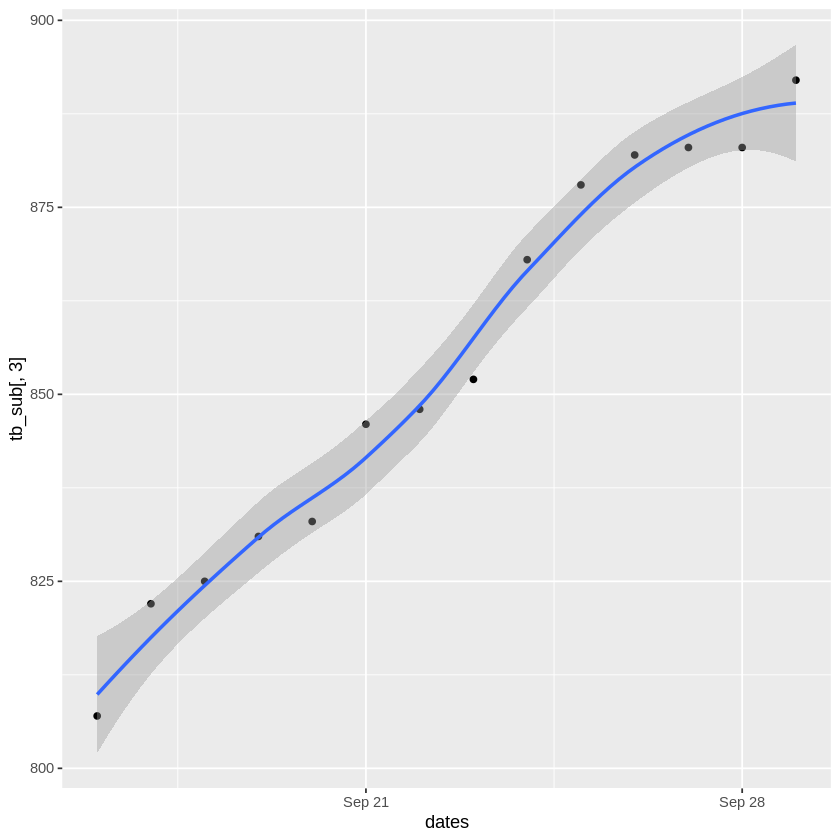

In [422]:
ggplot(tb_sub, aes( x = dates, y=tb_sub[,3])) + geom_point() + geom_smooth()

# Chapter 3, Let's look a specific county. 
How about Hamilton, TN? This is the county where Chattanooga, TN is located.


### Define the specific county. CHANGE HERE FOR YOUR PROJECT

In [437]:
mycountyname = 'Hamilton' #Change to your home county for your project
myState = 'Tennessee' #Change to your home state for your project
countyStateUSA = 'Hamilton, Tennessee, US' #Change based on your home county and state

In [438]:
print(paste("There are ", length(names(tb1)[ grep( mycountyname, colnames(tb1))] ), mycountyname, "counties in the USA"))

[1] "There are  10 Hamilton counties in the USA"


In [439]:
head(tb1)

,"Autauga, Alabama, US","Baldwin, Alabama, US","Barbour, Alabama, US","Bibb, Alabama, US","Blount, Alabama, US","Bullock, Alabama, US","Butler, Alabama, US","Calhoun, Alabama, US","Chambers, Alabama, US","Cherokee, Alabama, US",⋯,"Platte, Wyoming, US","Sheridan, Wyoming, US","Sublette, Wyoming, US","Sweetwater, Wyoming, US","Teton, Wyoming, US","Uinta, Wyoming, US","Unassigned, Wyoming, US","Washakie, Wyoming, US","Weston, Wyoming, US",dates
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
1/22/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2020-01-22
1/23/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2020-01-23
1/24/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2020-01-24
1/25/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2020-01-25
1/26/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2020-01-26
1/27/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2020-01-27


In [440]:
tb_mycounty <-  tb1 %>% 
   dplyr::select ( countyStateUSA, dates)

head(tb_mycounty)

,"Hamilton, Tennessee, US",dates
,<dbl>,<date>
1/22/20,0,2020-01-22
1/23/20,0,2020-01-23
1/24/20,0,2020-01-24
1/25/20,0,2020-01-25
1/26/20,0,2020-01-26
1/27/20,0,2020-01-27


In [441]:
tb_mycounty <- tb_mycounty %>%
   dplyr::filter( between(dates, mdy('4/1/20'), mdy('10/20/20')))
head(tb_mycounty)

,"Hamilton, Tennessee, US",dates
,<dbl>,<date>
4/1/20,50,2020-04-01
4/2/20,61,2020-04-02
4/3/20,67,2020-04-03
4/4/20,71,2020-04-04
4/5/20,74,2020-04-05
4/6/20,83,2020-04-06


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



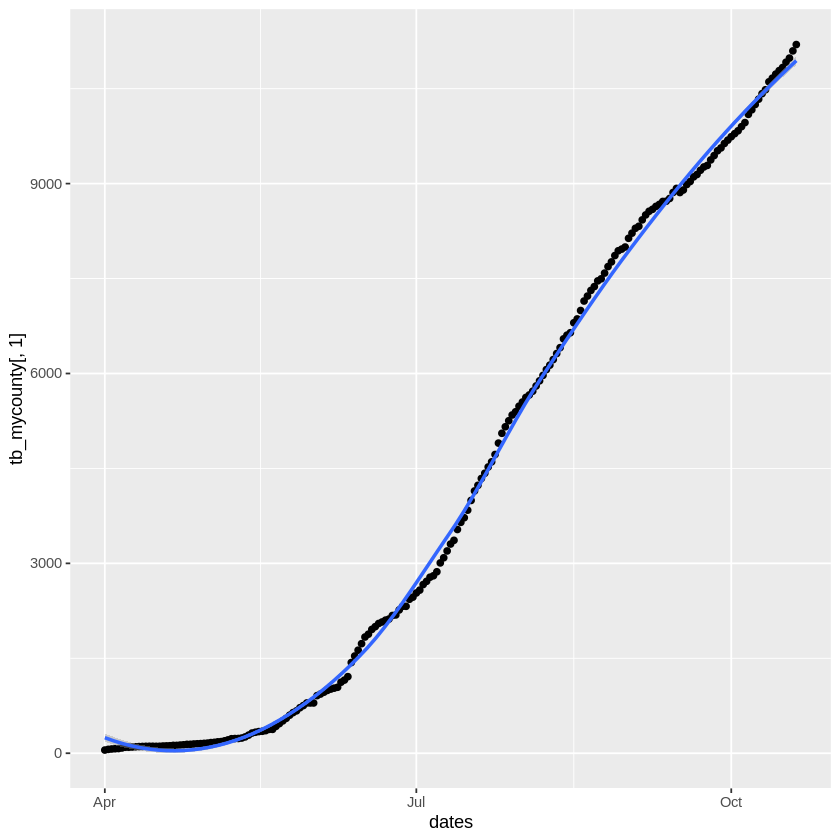

In [442]:
ggplot(tb_mycounty, aes( x = dates, y=tb_mycounty[,1])) + geom_point() + geom_smooth()

# Chapter 4. Look at daily cases

## Define the county and state. Change to your home county and state for your project

In [ ]:
mycounties = c( 'Hamilton, Tennessee, US') #Change to your home county and state

   ## Read the cumulative cases again

In [452]:
tb = read_csv(url("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"))

tb1 <- tb %>% dplyr::select(12:length(tb[1,])) %>% as.matrix()
tb1 = as.data.frame(t(tb1))

names(tb1) = tb$Combined_Key

current_dates = names(tb)[12:length(tb[1,])]
tb1$dates = mdy(current_dates)
#head(tb1)

days_window = 300  # time  window
endday = today(tzone ='EST')

tb_sub <- tb1 %>% 
  dplyr::select( all_of(mycounties), 'dates') %>%
  dplyr::filter( between(dates, endday-ddays(days_window), endday))   

head(tb_sub)


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  iso2 = col_character(),
  iso3 = col_character(),
  Admin2 = col_character(),
  Province_State = col_character(),
  Country_Region = col_character(),
  Combined_Key = col_character()
)
ℹ Use `spec()` for the full column specifications.




,"Hamilton, Tennessee, US",dates
,<dbl>,<date>
2/20/20,0,2020-02-20
2/21/20,0,2020-02-21
2/22/20,0,2020-02-22
2/23/20,0,2020-02-23
2/24/20,0,2020-02-24
2/25/20,0,2020-02-25


## Covert cumulative counts into daily cases

The diff function is helpful here. 

### Question: How do we find out the help page for diff()? 

In [453]:
tb_sub[,1]

[1]     0     0     0     0     0     0     0     0     0     0     0     0
 [13]     0     0     0     0     0     0     0     0     0     0     1     1
 [25]     1     1     1     3     5     5     7     8    12     8    26    30
 [37]    30    35    35    35    50    50    61    67    71    74    83    95
 [49]    95    98   102   105   107   109   110   110   109   110   114   116
 [61]   118   124   124   129   133   140   141   146   149   152   156   160
 [73]   168   172   180   184   196   211   229   232   233   240   258   286
 [85]   319   332   342   347   357   377   377   425   468   511   552   601
 [97]   642   670   719   753   794   794   794   910   935   964   992  1013
[109]  1028  1042  1122  1156  1210  1433  1536  1628  1731  1836  1881  1956
[121]  2000  2050  2074  2103  2120  2176  2185  2264  2321  2321  2433  2466
[133]  2532  2577  2665  2716  2781  2804  2867  3007  3088  3196  3305  3364
[145]  3535  3648  3721  3840  3994  4144  4233  4341  4424  4523  4604  4720
[157]  4900  5055  5158  5253  5344  5395  5483  5549  5621  5661  5720  5803
[169]  5884  5970  6062  6132  6220  6315  6408  6547  6605  6644  6801  6862
[181]  6995  7145  7223  7312  7373  7463  7496  7586  7689  7763  7863  7939
[193]  7965  7998  8136  8217  8294  8326  8427  8505  8563  8594  8640  8672
[205]  8718  8722  8765  8860  8924  8859  8899  8985  9033  9106  9144  9211
[217]  9263  9287  9374  9443  9519  9564  9634  9687  9741  9789  9835  9900
[229]  9964 10094 10166 10250 10334 10421 10483 10608 10666 10730 10785 10834
[241] 10918 10983 11097 11197 11289 11368 11497 11618 11758 11867 11952 12057
[253] 12175 12251 12300 12313 12395 12532 12652 12719 12818 13036 13191 13404
[265] 13551 13715 13866 13963 14202 14437 14797 14919 15066 15246 15382 15557
[277] 15723 15861 15944 16137 16369 16555 16701 16861 17311 17549 17857 18210
[289] 18414 18656 18824 19107 19417 19729 20052 20322 20664 21119 21535 21969

In [454]:
local_dailycases = c(0, diff( tb_sub[,1] )) 
str(x)

 num [1:100] 0.721 -1.217 -1.686 -0.209 0.403 ...


In [461]:
tb_daily_sub = data.frame( local_dailycases )
head(tb_daily_sub)

,local_dailycases
,<dbl>
1,0
2,0
3,0
4,0
5,0
6,0


In [462]:
tb_daily_sub$YMD = mdy(row.names(tb_sub))
head(tb_daily_sub)

,local_dailycases,YMD
,<dbl>,<date>
1,0,2020-02-20
2,0,2020-02-21
3,0,2020-02-22
4,0,2020-02-23
5,0,2020-02-24
6,0,2020-02-25


In [465]:
row.names(tb_daily_sub) = tb_daily_sub$YMD #add row names

In [467]:
names(tb_daily_sub)[1] = mycounties #add column names

In [459]:
tail(tb_daily_sub)

,"Hamilton, Tennessee, US",YMD
,<dbl>,<date>
2020-12-10,323,2020-12-10
2020-12-11,270,2020-12-11
2020-12-12,342,2020-12-12
2020-12-13,455,2020-12-13
2020-12-14,416,2020-12-14
2020-12-15,434,2020-12-15


## Plot the daily cases

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



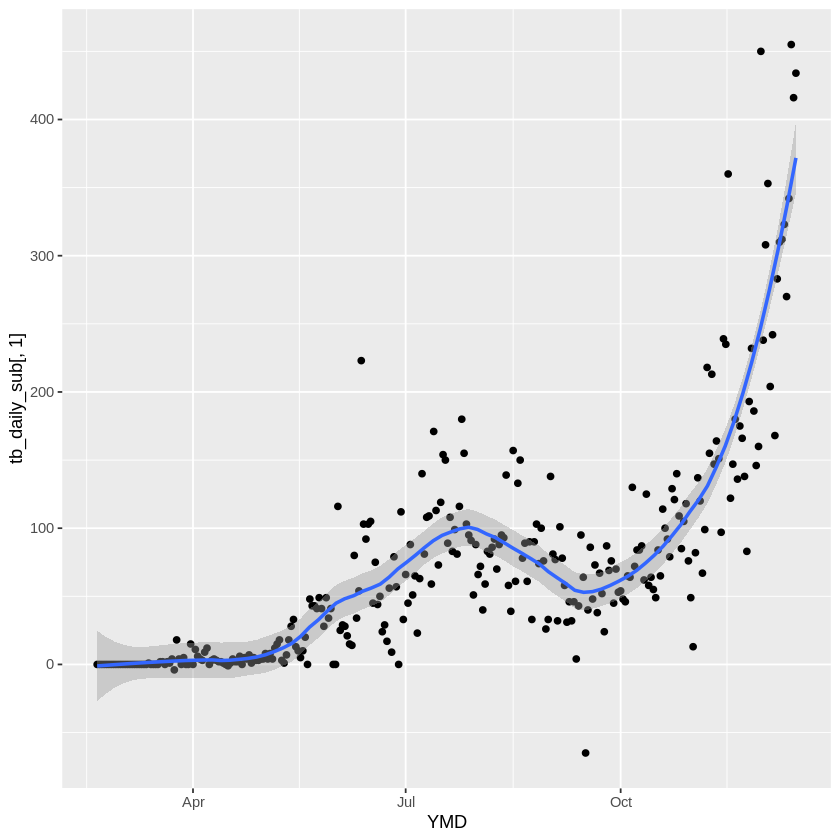

In [468]:
myplot <- ggplot(tb_daily_sub, aes(x=YMD, y=tb_daily_sub[,1]))
myplot + geom_point() + stat_smooth(span=0.3)

# Chapter 5. Google Mobility analysis


## Background, mobility and social distance

Mobility can gauge the social distance practice

Google Community Mobility report 
https://www.google.com/covid19/mobility/

## Regional mobility

We can download Google community mobility report directly to CoLab

In [469]:
system("wget https://www.gstatic.com/covid19/mobility/Region_Mobility_Report_CSVs.zip")

We should now see "Region_Mobility_Report_CSV.zip" in /content folder. 

We can unzip this file to get the csv file.

In [471]:
system("unzip /content/Region_Mobility_Report_CSVs.zip")

We should now see "/content/2020_US_Region_Mobility_Report.csv"

In [472]:
library(tidyverse)
tbGMUS = read_csv("/content/2020_US_Region_Mobility_Report.csv")
tail(tbGMUS)


── Column specification ────────────────────────────────────────────────────────
cols(
  country_region_code = col_character(),
  country_region = col_character(),
  sub_region_1 = col_character(),
  sub_region_2 = col_character(),
  metro_area = col_logical(),
  iso_3166_2_code = col_character(),
  census_fips_code = col_character(),
  date = col_date(format = ""),
  retail_and_recreation_percent_change_from_baseline = col_double(),
  grocery_and_pharmacy_percent_change_from_baseline = col_double(),
  parks_percent_change_from_baseline = col_double(),
  transit_stations_percent_change_from_baseline = col_double(),
  workplaces_percent_change_from_baseline = col_double(),
  residential_percent_change_from_baseline = col_double()
)




country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
US,United States,Wyoming,Weston County,NA,NA,56045,2020-12-04,NA,NA,NA,NA,-14,NA
US,United States,Wyoming,Weston County,NA,NA,56045,2020-12-07,NA,NA,NA,NA,-18,NA
US,United States,Wyoming,Weston County,NA,NA,56045,2020-12-08,NA,NA,NA,NA,-12,NA
US,United States,Wyoming,Weston County,NA,NA,56045,2020-12-09,NA,NA,NA,NA,-17,NA
US,United States,Wyoming,Weston County,NA,NA,56045,2020-12-10,NA,NA,NA,NA,-13,NA
US,United States,Wyoming,Weston County,NA,NA,56045,2020-12-11,NA,NA,NA,NA,-12,NA


It seems Google Mobility not updated daily.

## Pick Mobility data from my county. 

### Define the location. CHANGE HERE FOR YOUR PROJECT

In [473]:
myState = 'Tennessee'
myCounty = "Hamilton County" #Google location is different from JHU

## Parse the mobility data for the location

In [474]:
tbGMmycounty <-
  tbGMUS %>% filter( sub_region_1 == myState, sub_region_2 == myCounty)
head(tbGMmycounty)

country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
US,United States,Tennessee,Hamilton County,NA,NA,47065,2020-02-15,12,6,54,7,1,-1
US,United States,Tennessee,Hamilton County,NA,NA,47065,2020-02-16,6,-1,24,-2,0,-1
US,United States,Tennessee,Hamilton County,NA,NA,47065,2020-02-17,10,0,54,0,-15,4
US,United States,Tennessee,Hamilton County,NA,NA,47065,2020-02-18,-1,-4,-1,5,0,1
US,United States,Tennessee,Hamilton County,NA,NA,47065,2020-02-19,4,6,14,6,2,0
US,United States,Tennessee,Hamilton County,NA,NA,47065,2020-02-20,-7,-5,-28,-4,-1,3


In [475]:
tail(tbGMmycounty)

country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
US,United States,Tennessee,Hamilton County,NA,NA,47065,2020-12-08,-12,-5,11,-51,-28,9
US,United States,Tennessee,Hamilton County,NA,NA,47065,2020-12-09,-11,-2,6,-48,-30,10
US,United States,Tennessee,Hamilton County,NA,NA,47065,2020-12-10,-13,-3,7,-51,-29,9
US,United States,Tennessee,Hamilton County,NA,NA,47065,2020-12-11,-15,-5,11,-44,-29,10
US,United States,Tennessee,Hamilton County,NA,NA,47065,2020-12-12,-17,-4,-25,-51,-13,5
US,United States,Tennessee,Hamilton County,NA,NA,47065,2020-12-13,-10,-3,1,-58,-16,4


In [476]:
length(names(tbGMmycounty))

[1] 14

In [478]:
max(tbGMmycounty$date) #the most recent date of the mobility report

[1] "2020-12-13"

## Merge mobility and covid19 data for our location/county





First, pick the daily case of my county

In [479]:
head( tb_daily_sub)

,"Hamilton, Tennessee, US",YMD
,<dbl>,<date>
2020-02-20,0,2020-02-20
2020-02-21,0,2020-02-21
2020-02-22,0,2020-02-22
2020-02-23,0,2020-02-23
2020-02-24,0,2020-02-24
2020-02-25,0,2020-02-25


In [480]:
tb_daily_mycounty = tb_daily_sub
names(tb_daily_mycounty) = c("DailyCases", "date")
tail(tb_daily_mycounty)

,DailyCases,date
,<dbl>,<date>
2020-12-10,323,2020-12-10
2020-12-11,270,2020-12-11
2020-12-12,342,2020-12-12
2020-12-13,455,2020-12-13
2020-12-14,416,2020-12-14
2020-12-15,434,2020-12-15


Now, find the shared time window
between tb_daily_sub and tbGMmycounty


In [481]:
 tb_GMCovidmycounty = merge(x=tb_daily_mycounty, y=tbGMmycounty, by= 'date', all.y=FALSE)
 row.names(  tb_GMCovidmycounty ) =  tb_GMCovidmycounty$date

In [482]:
tail( tb_GMCovidmycounty )

,date,DailyCases,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
,<date>,<dbl>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2020-12-08,2020-12-08,310,US,United States,Tennessee,Hamilton County,NA,NA,47065,-12,-5,11,-51,-28,9
2020-12-09,2020-12-09,312,US,United States,Tennessee,Hamilton County,NA,NA,47065,-11,-2,6,-48,-30,10
2020-12-10,2020-12-10,323,US,United States,Tennessee,Hamilton County,NA,NA,47065,-13,-3,7,-51,-29,9
2020-12-11,2020-12-11,270,US,United States,Tennessee,Hamilton County,NA,NA,47065,-15,-5,11,-44,-29,10
2020-12-12,2020-12-12,342,US,United States,Tennessee,Hamilton County,NA,NA,47065,-17,-4,-25,-51,-13,5
2020-12-13,2020-12-13,455,US,United States,Tennessee,Hamilton County,NA,NA,47065,-10,-3,1,-58,-16,4


In [483]:
print( paste( "There are ", length(tb_GMCovidmycounty[1,]), "columns"))

[1] "There are  15 columns"


### select columns with mobility values

In [484]:
tb_GMCovidmycounty2  <- tb_GMCovidmycounty  %>% dplyr::select(2, 10:15 ) # select values columns
head(tb_GMCovidmycounty2 )

,DailyCases,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2020-02-20,0,-7,-5,-28,-4,-1,3
2020-02-21,0,3,-2,16,4,-8,3
2020-02-22,0,8,4,68,12,5,-1
2020-02-23,0,1,-2,3,0,3,0
2020-02-24,0,-4,-7,-24,-7,1,2
2020-02-25,0,9,1,55,9,3,-1


## Normalize the mobility data for overlay

In [485]:
tb_GMCovidmycounty_scaled <-  data.frame( scale(tb_GMCovidmycounty2) )
head( tb_GMCovidmycounty_scaled  )

,DailyCases,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2020-02-20,-0.8974856,0.5478162,-0.5181207,-1.7057147,1.686458,2.014045,-0.9987249
2020-02-21,-0.8974856,1.3171339,-0.1118050,-0.6070475,2.161039,1.482975,-0.9987249
2020-02-22,-0.8974856,1.7017928,0.7008265,0.6913774,2.635620,2.469248,-1.7881679
2020-02-23,-0.8974856,1.1632704,-0.1118050,-0.9316537,1.923748,2.317514,-1.5908071
2020-02-24,-0.8974856,0.7786115,-0.7889979,-1.6058358,1.508490,2.165779,-1.1960856
2020-02-25,-0.8974856,1.7787246,0.2945107,0.3667712,2.457652,2.317514,-1.7881679


In [486]:
# add the date column back
tb_GMCovidmycounty_scaled$date = ymd(row.names(tb_GMCovidmycounty_scaled))
tail( tb_GMCovidmycounty_scaled  )

,DailyCases,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,date
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
2020-12-08,3.028350,0.16315732,-0.5181207,-0.7318960,-1.1017060,-0.03436937,0.1854396,2020-12-08
2020-12-09,3.053678,0.24008910,-0.1118050,-0.8567446,-0.9237381,-0.18610376,0.3828004,2020-12-09
2020-12-10,3.192982,0.08622555,-0.2472436,-0.8317748,-1.1017060,-0.11023656,0.1854396,2020-12-10
2020-12-11,2.521791,-0.06763800,-0.5181207,-0.7318960,-0.6864476,-0.11023656,0.3828004,2020-12-11
2020-12-12,3.433597,-0.22150155,-0.3826822,-1.6308055,-1.1017060,1.10363858,-0.6040034,2020-12-12
2020-12-13,4.864628,0.31702087,-0.2472436,-0.9815931,-1.5169644,0.87603699,-0.8013641,2020-12-13


## Overlay mobility and daily cases

In [487]:
names(tb_GMCovidmycounty_scaled )

[1] "DailyCases"                                        
[2] "retail_and_recreation_percent_change_from_baseline"
[3] "grocery_and_pharmacy_percent_change_from_baseline" 
[4] "parks_percent_change_from_baseline"                
[5] "transit_stations_percent_change_from_baseline"     
[6] "workplaces_percent_change_from_baseline"           
[7] "residential_percent_change_from_baseline"          
[8] "date"

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



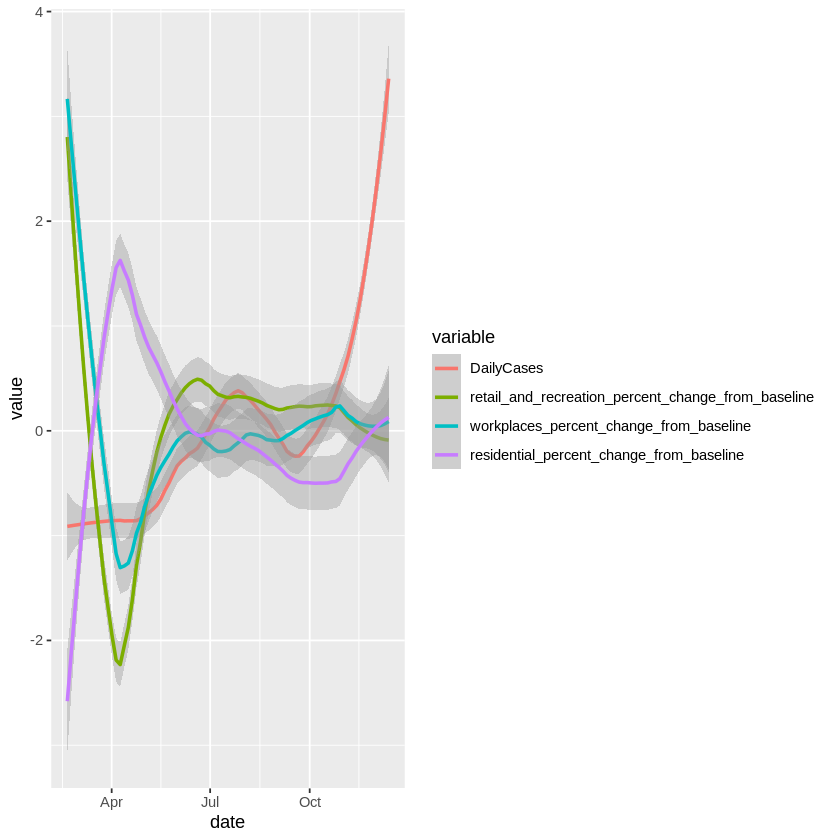

In [488]:
selected_columns = c('DailyCases', 'retail_and_recreation_percent_change_from_baseline', 
'workplaces_percent_change_from_baseline','residential_percent_change_from_baseline')

#selected_columns = c('DailyCases','workplaces_percent_change_from_baseline','residential_percent_change_from_baseline')

df_melt <- melt(tb_GMCovidmycounty_scaled, measure.vars=selected_columns, value.names="Values", varialbe.name="varialbe" )
ggplot(df_melt, aes(x=date, y=value, color=variable)) + stat_smooth(span=0.3)


# Chapter 6. Does the local weather correlared with Covid19 ?  

### Get weather data from Local airport

See https://rdrr.io/cran/worldmet/man/importNOAA.html 

This installation may take about 10 minutes

In [489]:
install.packages("worldmet", lib='/content')

In [490]:
library(worldmet, lib.loc="/content")

# Find out the latitude and longitude of the location. CHANGE HERE FOR YOUR PROJECT

We can google for latitude and longitude for a location. 
For example,  "Fairfax county, VA latitude longitude"

The continent USA have Longitute West, and should be negative. 

For example, Lovell, TN is 35.03, -85.2. 

In [510]:
info <- getMeta(lat = 35.03, lon = -85.2) # Lovell, TN
info

usaf,wban,station,ctry,st,call,latitude,longitude,elev(m),begin,end,code,longr,latr,dist
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<date>,<date>,<chr>,<dbl>,<dbl>,<dbl>
723240,13882,LOVELL FIELD AIRPORT,US,TN,KCHA,35.034,-85.200,204.2,1973-01-01,2020-12-15,723240-13882,-1.487021,0.6114587,0.4447797
722154,53885,DALTON MUNICIPAL AIRPORT,US,GA,KDNN,34.722,-84.869,216.4,2006-01-01,2020-12-15,722154-53885,-1.481243,0.6060132,45.6580326
999999,63862,VALLEY HEAD 1 SSW,US,AL,NA,34.565,-85.617,310.9,2006-05-04,2020-12-14,999999-63862,-1.494299,0.6032731,64.2126670
723200,93801,RICHARD B RUSSELL AIRPORT,US,GA,KRMG,34.348,-85.161,194.8,1978-01-01,2020-12-15,723200-93801,-1.486340,0.5994857,75.9187235
A00013,63847,ISBELL FIELD AIRPORT,US,AL,K4A9,34.474,-85.721,267.3,2006-01-01,2020-12-15,A00013-63847,-1.496114,0.6016848,78.0247773
720974,00344,WINCHESTER MUNICIPAL AIRPORT,US,TN,KBGF,35.178,-86.066,298.1,2012-02-09,2020-12-15,720974-00344,-1.502135,0.6139719,80.4799468
999999,63896,SCOTTSBORO 2 NE,US,AL,NA,34.694,-86.000,193.9,2006-08-16,2020-12-14,999999-63896,-1.500983,0.6055245,81.9970693
720856,00284,SCOTTSBORO MUNICIPAL AIRPORT WORD FIELD,US,AL,K4A6,34.689,-86.006,198.1,2010-11-30,2020-12-15,720856-00284,-1.501088,0.6054373,82.7400387
721031,00348,TULLAHOMA REGIONAL AIRPORT WILLIAM NORTHERN FIELD,US,TN,KTHA,35.380,-86.246,330.1,2012-04-08,2020-12-15,721031-00348,-1.505277,0.6174975,102.6954293


Pick the first row

In [511]:
local_code = paste( info$usaf[1], info$wban[1], sep='-')
local_code

[1] "723240-13882"

Now, get weather data from NOAA

In [512]:
weatherLocal <- importNOAA(code = local_code, year = 2020)
head(weatherLocal)

code,station,date,latitude,longitude,elev,ws,wd,air_temp,atmos_pres,⋯,cl_1,cl_2,cl_3,cl,cl_1_height,cl_2_height,cl_3_height,precip_6,precip,pwc
<fct>,<fct>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
723240-13882,"CHATTANOOGA AIRPORT, TN US",2020-01-01 00:00:00,35.03362,-85.20044,204.2,2.85,214.5603,8.05,1016.2,⋯,0,NA,NA,0,NA,NA,NA,NA,0,NA
723240-13882,"CHATTANOOGA AIRPORT, TN US",2020-01-01 01:00:00,35.03362,-85.20044,204.2,2.10,230.0000,7.80,1016.7,⋯,0,NA,NA,0,NA,NA,NA,NA,0,NA
723240-13882,"CHATTANOOGA AIRPORT, TN US",2020-01-01 02:00:00,35.03362,-85.20044,204.2,2.10,220.0000,6.70,1016.8,⋯,0,NA,NA,0,NA,NA,NA,NA,0,NA
723240-13882,"CHATTANOOGA AIRPORT, TN US",2020-01-01 03:00:00,35.03362,-85.20044,204.2,2.10,250.0000,6.10,1017.6,⋯,0,NA,NA,0,NA,NA,NA,NA,0,NA
723240-13882,"CHATTANOOGA AIRPORT, TN US",2020-01-01 04:00:00,35.03362,-85.20044,204.2,2.60,260.0000,6.10,1017.8,⋯,0,NA,NA,0,NA,NA,NA,NA,0,NA
723240-13882,"CHATTANOOGA AIRPORT, TN US",2020-01-01 05:00:00,35.03362,-85.20044,204.2,1.50,280.0000,4.40,1017.8,⋯,0,NA,NA,0,NA,NA,NA,NA,0,NA


In [513]:
names(weatherLocal)

[1] "code"        "station"     "date"        "latitude"    "longitude"  
 [6] "elev"        "ws"          "wd"          "air_temp"    "atmos_pres" 
[11] "visibility"  "dew_point"   "RH"          "ceil_hgt"    "cl_1"       
[16] "cl_2"        "cl_3"        "cl"          "cl_1_height" "cl_2_height"
[21] "cl_3_height" "precip_6"    "precip"      "pwc"

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Warning message:
“Removed 31 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 21 row(s) containing missing values (geom_path).”


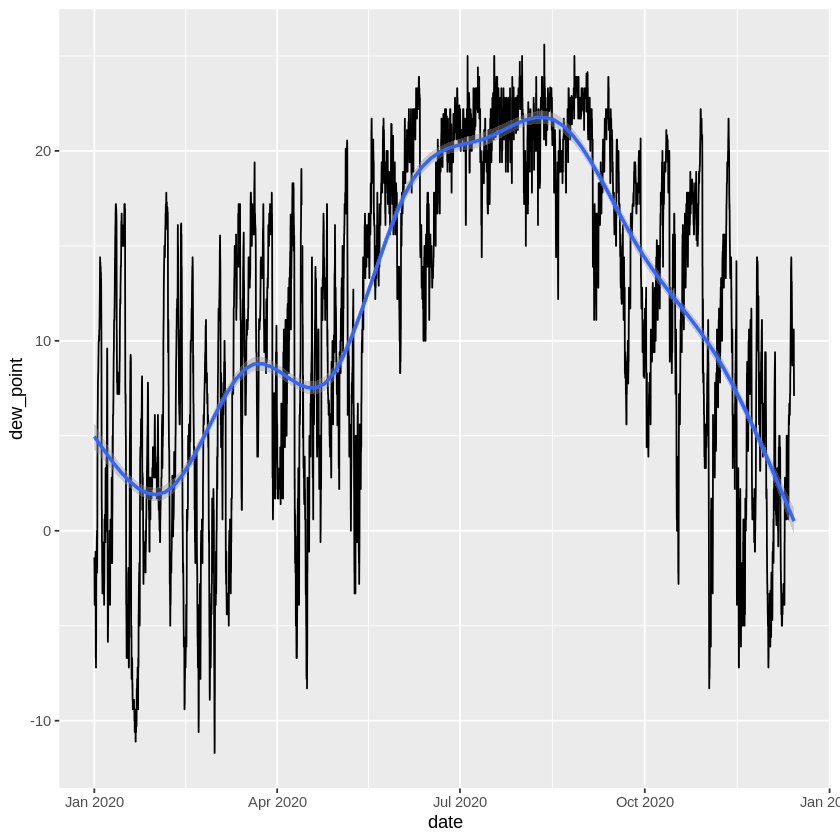

In [514]:
library(ggplot2)
ggplot(weatherLocal, aes(x=date,y=dew_point)) + geom_line() + stat_smooth(span=0.3)

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Warning message:
“Removed 30 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 21 row(s) containing missing values (geom_path).”


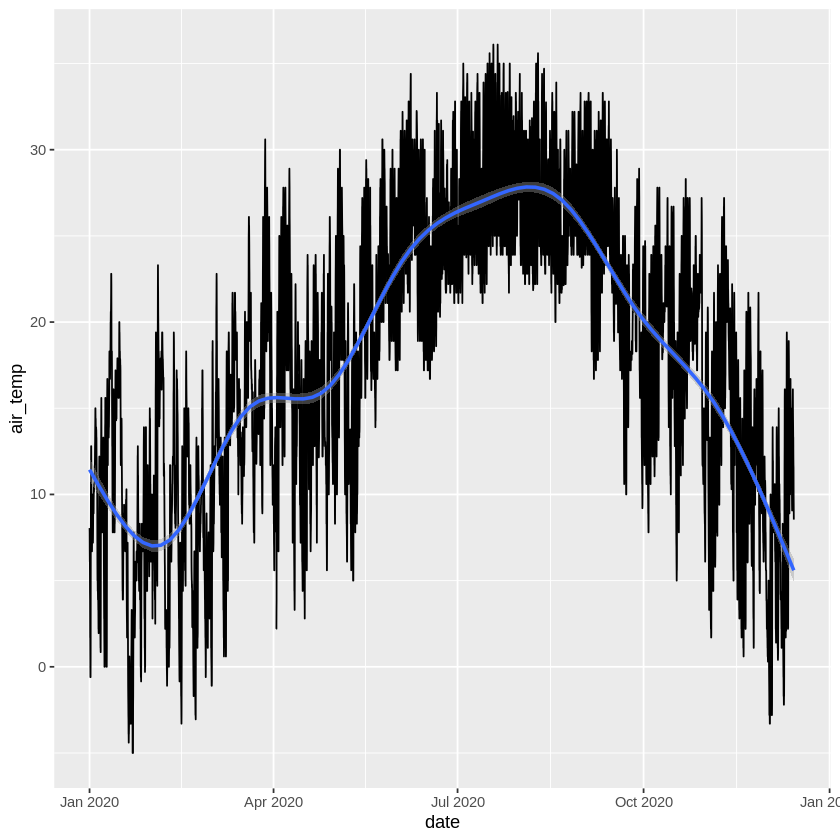

In [515]:
ggplot(weatherLocal, aes(x=date,y=air_temp)) + geom_line() + stat_smooth(span=0.3)

Pick air temperature, dew_point, and relative humidity

In [516]:
weatherLocal2 <- weatherLocal %>% dplyr::select( c('date', 'air_temp', 'dew_point', 'RH'))
head(weatherLocal2)

date,air_temp,dew_point,RH
<dttm>,<dbl>,<dbl>,<dbl>
2020-01-01 00:00:00,8.05,-1.4,51.69594
2020-01-01 01:00:00,7.80,-1.7,51.40293
2020-01-01 02:00:00,6.70,-2.2,53.40894
2020-01-01 03:00:00,6.10,-3.3,51.31885
2020-01-01 04:00:00,6.10,-3.9,49.08370
2020-01-01 05:00:00,4.40,-3.3,57.71365


### Reformate dates

In [517]:
library(lubridate)

In [518]:
clean_dates = gsub( " UTC ", "", weatherLocal2$date)
weatherLocal2$YMD = as.Date(clean_dates)
head(weatherLocal2)

date,air_temp,dew_point,RH,YMD
<dttm>,<dbl>,<dbl>,<dbl>,<date>
2020-01-01 00:00:00,8.05,-1.4,51.69594,2020-01-01
2020-01-01 01:00:00,7.80,-1.7,51.40293,2020-01-01
2020-01-01 02:00:00,6.70,-2.2,53.40894,2020-01-01
2020-01-01 03:00:00,6.10,-3.3,51.31885,2020-01-01
2020-01-01 04:00:00,6.10,-3.9,49.08370,2020-01-01
2020-01-01 05:00:00,4.40,-3.3,57.71365,2020-01-01


Calculate the daily average weather measurement 

In [519]:
weatherLocal3 <- weatherLocal2 %>% group_by( YMD ) %>% summarise_if( is.numeric, mean, na.rm=TRUE)

tail( weatherLocal3 )

YMD,air_temp,dew_point,RH
<date>,<dbl>,<dbl>,<dbl>
2020-12-10,8.221181,2.753750,72.79753
2020-12-11,9.256250,3.970833,72.70274
2020-12-12,12.412500,9.500000,82.94021
2020-12-13,12.428819,10.568056,89.23105
2020-12-14,11.255000,9.452083,88.96425
2020-12-15,NaN,NaN,NaN


### Merge local weather data with Covid19 data

In [520]:
tail(tb_GMCovidmycounty2)
tb_GMCovidmycounty2$YMD = ymd( row.names(tb_GMCovidmycounty2) )

,DailyCases,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,YMD
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
2020-12-08,310,-12,-5,11,-51,-28,9,2020-12-08
2020-12-09,312,-11,-2,6,-48,-30,10,2020-12-09
2020-12-10,323,-13,-3,7,-51,-29,9,2020-12-10
2020-12-11,270,-15,-5,11,-44,-29,10,2020-12-11
2020-12-12,342,-17,-4,-25,-51,-13,5,2020-12-12
2020-12-13,455,-10,-3,1,-58,-16,4,2020-12-13


In [521]:
tail(tb_GMCovidmycounty2)

,DailyCases,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,YMD
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
2020-12-08,310,-12,-5,11,-51,-28,9,2020-12-08
2020-12-09,312,-11,-2,6,-48,-30,10,2020-12-09
2020-12-10,323,-13,-3,7,-51,-29,9,2020-12-10
2020-12-11,270,-15,-5,11,-44,-29,10,2020-12-11
2020-12-12,342,-17,-4,-25,-51,-13,5,2020-12-12
2020-12-13,455,-10,-3,1,-58,-16,4,2020-12-13


The "merge()" is a uselful command

In [522]:
tb_local=   merge(x=tb_GMCovidmycounty2, y=weatherLocal3, by= 'YMD', all.y=FALSE)
row.names( tb_local ) = tb_local$YMD
tail(tb_local)

,YMD,DailyCases,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,air_temp,dew_point,RH
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2020-12-08,2020-12-08,310,-12,-5,11,-51,-28,9,3.806250,-3.968750,57.62878
2020-12-09,2020-12-09,312,-11,-2,6,-48,-30,10,4.352083,-1.252083,70.49507
2020-12-10,2020-12-10,323,-13,-3,7,-51,-29,9,8.221181,2.753750,72.79753
2020-12-11,2020-12-11,270,-15,-5,11,-44,-29,10,9.256250,3.970833,72.70274
2020-12-12,2020-12-12,342,-17,-4,-25,-51,-13,5,12.412500,9.500000,82.94021
2020-12-13,2020-12-13,455,-10,-3,1,-58,-16,4,12.428819,10.568056,89.23105


In [523]:
cbind( names( tb_local ), seq(1:length(tb_local[1,])))

YMD,1
DailyCases,2
retail_and_recreation_percent_change_from_baseline,3
grocery_and_pharmacy_percent_change_from_baseline,4
parks_percent_change_from_baseline,5
transit_stations_percent_change_from_baseline,6
workplaces_percent_change_from_baseline,7
residential_percent_change_from_baseline,8
air_temp,9
dew_point,10
RH,11


In [524]:
names(tb_local) = c("YMD", "DailyCases", "retail", "grocery", "parks", "transit", "workplace", "residential", "air_temp", "dew_point", "RH")

In [525]:
startdate = mdy('3/1/2020')
enddate  = today(tzone='EST')

tb_local2 <- tb_local %>% 
  #dplyr::select( c(1,2,)) %>%
  dplyr::filter( between(YMD, startdate, enddate))
  
head( tb_local2 )


,YMD,DailyCases,retail,grocery,parks,transit,workplace,residential,air_temp,dew_point,RH
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2020-03-01,2020-03-01,0,13,6,44,13,3,-2,6.750000,-2.731250,56.63595
2020-03-02,2020-03-02,0,2,0,-20,-3,0,2,9.814583,6.854167,83.40979
2020-03-03,2020-03-03,0,13,7,54,12,1,-1,16.348264,12.214583,80.43204
2020-03-04,2020-03-04,0,9,7,22,8,2,-1,14.316667,5.279167,56.29383
2020-03-05,2020-03-05,0,8,6,4,13,2,0,11.585417,7.622917,77.22352
2020-03-06,2020-03-06,0,7,2,31,13,2,0,9.316667,1.639583,63.64460


### plot cases and weather

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



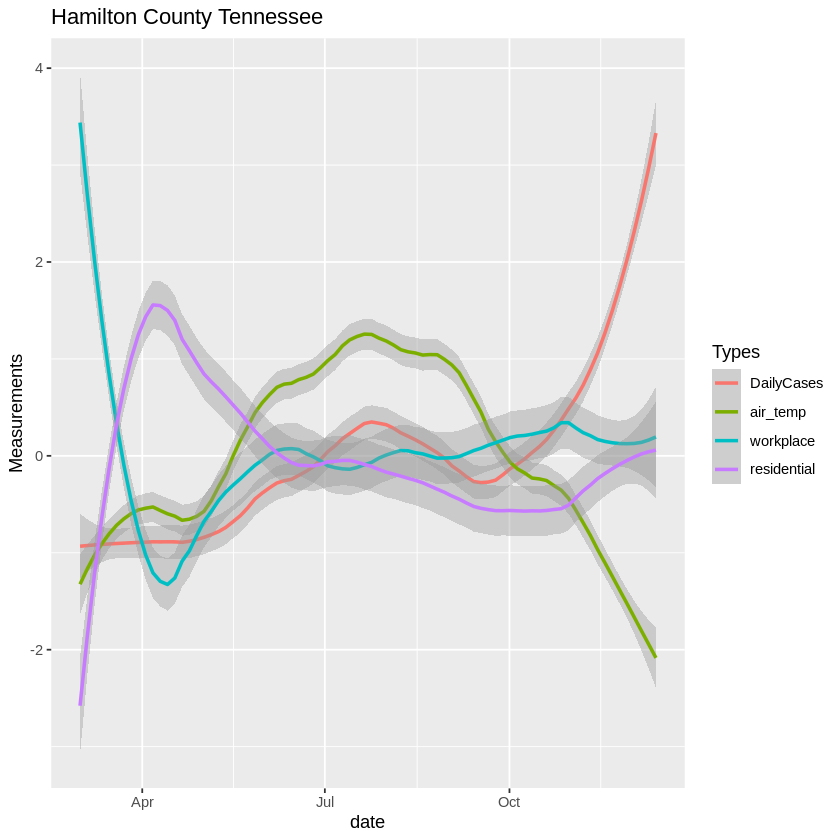

In [508]:
tb_local_scaled = data.frame( as.matrix(scale(tb_local2[,2:11])) )
tb_local_scaled$date = tb_local2$YMD

df_tmp <- melt(tb_local_scaled, measure.vars = c("DailyCases", "air_temp", "workplace", "residential" ), value.name = 'Measurements', variable.name = 'Types')
plot <- ggplot(df_tmp, aes(x=date, y=Measurements, color=Types)) + stat_smooth(span=0.3)
plot + ggtitle( paste( myCounty, myState))

# Chapter 7 (Optional), Explore the USA state-level data

Group by states

## Convert the county-level time series data to state-level data 

In [ ]:
tb0 = read_csv(url("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"))
#str(tb.jhu) #this is a tibble
head(tb0)

merge all row of the same state by 'group_by'
follow by 'summarize_if'

In [ ]:
tb1 = tb0[, c(7, 50:length(tb[1,])) ]

tb2 <- tb1 %>%
  group_by(Province_State) %>%
  summarize_if(is.numeric, sum,na.rm=TRUE)

head(tb2)

In [ ]:
length( tb2$Province_State )
print( paste("There are ", length( tb2$Province_State ),  " states"))

## Covert cumulative counts into daily cases

### First, do a few tests on simple data sets to make sure that we know what we are doing.

In [ ]:
? apply

In [ ]:
? diff

In [ ]:
x = data.frame(1:10)
x

In [ ]:
apply(x, 2, diff)

In [ ]:
y = data.frame(10:1)
y

In [ ]:
apply(y, 2, diff)

### Now, process a small data set to verify the results

In [ ]:
test = tb2[1:5, 10:20]
test

In [ ]:
apply( test, 1, diff)

### Now, we are comfortable to apply our method to the entire data set. 

In [ ]:
tb3 = apply(tb2[, 2:length(tb2[1,])], 1, diff)
tb3= data.frame(tb3)
head(tb3)

## Add states names as columns names

Current names are not informative

In [ ]:
names(tb3)

Information of States will be more relevant.

In [ ]:
tb2$Province_State

Assign the columns names with the State-names

In [ ]:
names(tb3) = tb2$Province_State
head(tb3)

## Convert date-text to Date type

In [ ]:
row.names(tb3)

In [ ]:
tb3$dates = mdy(row.names(tb3))
head(tb3)

## Plot

In [ ]:
tb3[,2]

### Scatter plot with trend

In [ ]:
ggplot(tb3, aes(x=dates, y=Colorado)) + geom_point() + geom_smooth()


### Plot for a time-window

In [ ]:
#end = mdy("5/1/20")
end = today(tzone='EST') - 1
end

In [ ]:
tb_sub <- 
 tb3 %>% filter( dates >= end- ddays(90), dates <  end) #This is 90 day window

ggplot(tb_sub, aes(x=dates, y=Colorado)) + geom_point() + geom_smooth()


### Let's look a specific State. 
How about Tennessee? 

In [ ]:
names(tb3)

In [ ]:
days_window = 90 #90-day window
endday = today(tzone = 'EST')

tb_TN <- tb3 %>% 
  dplyr::select( 'Tennessee', 'dates') %>%
  dplyr::filter( between(dates, endday-ddays(days_window), endday)) 

In [ ]:
head(tb_TN)

In [ ]:
ggplot(tb_TN, aes(x=dates, y=tb_TN[,1])) + geom_point() + geom_smooth()

### Multiple plots to compare two states

In [ ]:
days_window = 90 #90-day window
endday = today(tzone='EST') -1

mystates = c('Tennessee', 'Wisconsin', 'South Dakota')

tb_2States <- tb3 %>% 
  dplyr::select( c(mystates, 'dates') ) %>%
  dplyr::filter( between(dates, endday-ddays(days_window), endday))   

tail(tb_2States)

In [ ]:
library(reshape2)

In [ ]:
df_tmp <- melt(tb_2States, measure.vars = mystates)
head(df_tmp)

In [ ]:
names(df_tmp) = c("dates", "State", "DailyCases")
head(df_tmp)

In [ ]:
ggplot(df_tmp, aes(x=dates, y=DailyCases, color=State)) + geom_point() + stat_smooth(spanc=0.3)

### How about more than two states? 

In [ ]:
mystates = c('Tennessee','Georgia', 'Alabama', 'Florida')

days_window = 90 #90-day window
endday = today(tzone = 'EST') -1

tb_sub <- tb3 %>% 
  dplyr::select( all_of(mystates), 'dates') %>%
  dplyr::filter( between(dates, endday-ddays(days_window), endday))   

head(tb_sub)


In [ ]:
df_tmp <- melt(tb_sub, measure.vars = mystates, value.name = 'DailyCases', variable.name = 'State')
head(df_tmp)

In [ ]:
ggplot(df_tmp, aes(x=dates, y=log10(DailyCases), color=State)) + geom_point() + geom_smooth() 

# Chapter 8 (Optional). Transmission analysis

### Study the Germany 1918 example

In [ ]:
install.packages('R0', lib = '/content')
#library('R0')
library("R0", lib.loc="/content")

In [ ]:
help(package='R0')

In [ ]:
#?est.R0.AR
#$example(est.R0.AR)

In [ ]:
data(Germany.1918)
head(Germany.1918)

In [ ]:
str(Germany.1918)

In [ ]:
plot(Germany.1918)

In [ ]:
?est.R0.TD

In [ ]:
example(est.R0.TD)

In [ ]:
mGT <- generation.time("gamma", c(3,1.5))
SB <- est.R0.SB(Germany.1918, mGT, begin=1, end=100)
str(SB)

In [ ]:
plot(SB)

### Estimate Rt to Covid19 for Tennessee

The mean generation time of Covid19 is estimated to 4-5 days. 

In [ ]:
mystates = c('Tennessee','Georgia', 'Alabama', 'Florida')

days_window = 180 #90-day window
endday = today(tzone = 'EST') -1

tb_sub <- tb3 %>% 
  dplyr::select( all_of(mystates), 'dates') %>%
  dplyr::filter( between(dates, endday-ddays(days_window), endday))   

head(tb_sub)

In [ ]:
length(tb_sub[,1])

In [ ]:
mGT<-generation.time("gamma", c(5, 1.5)) #model of serial generation time for SARS-CoV-2, (4, 7)
mGT

In [ ]:
TD <- est.R0.TD(tb_sub$Tennessee, mGT, begin=1, end=181, nsim=100)

In [ ]:
#str(TD)
length(tb_sub[,1])

In [ ]:
tb_sub$Rt = TD$R

In [ ]:
ggplot( tb_sub, aes(x=dates, y=Rt) ) +
   geom_point() + 
   stat_smooth( span=0.4)

## How about Hamilton County, TN? 

In [ ]:
install.packages('R0')
library('R0')

In [ ]:
library(tidyverse)
library(lubridate)
tb = read_csv(url("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"))

tb1 <- tb %>% dplyr::select(12:length(tb[1,])) %>% as.matrix()
tb1 = as.data.frame(t(tb1))

names(tb1) = tb$Combined_Key

current_dates = names(tb)[12:length(tb[1,])]
tb1$dates = mdy(current_dates)

### Select Hamilton, Tennessee, US

In [ ]:
names(tb1) [grep(  "Tennessee", names(tb1))]

In [ ]:
window = 180

tb_sub <-  tb1 %>% 
  dplyr::select ( c('Hamilton, Tennessee, US', 'Davidson, Tennessee, US', 'dates')) %>%
  dplyr::filter( between(dates, today(tzone='EST') - window,  today(tzone ='EST')))

str(tb_sub)

In [ ]:
ggplot(tb_sub, aes(x=dates, y=tb_sub[,1])) + geom_point()

In [ ]:
tail(tb_sub)

### Estiamte daily cases

March 31 Tuesday has 15 cases, but Sunday and Monday has zero cases. 

Hong will try to spead the spike daily counts into previous days with zeros. 

In [ ]:
tb_daily_sub = data.frame( apply(tb_sub[,1:2], 2, diff) )
head(tb_daily_sub, n=15)

In [ ]:
wday(mdy('3/31/20'))

In [ ]:
tb_daily_sub$YMD = mdy(row.names(tb_daily_sub))
head(tb_daily_sub)

In [ ]:
# make sure all daily cases are positive integer or zeros
tb_daily_sub$Hamilton..Tennessee..US[tb_daily_sub$Hamilton..Tennessee..US<0 ] =0
head(tb_daily_sub)
summary(  tb_daily_sub)

In [ ]:
# correct some errors in Hamilton TN 
#tb_daily_sub[c('3/20/20', '3/21/20'), 1] = c(1,1)
#tb_daily_sub[c('3/24/20', '3/25/20'), 1] = c(7, 7)
#tb_daily_sub[c('3/29/20', '3/30/20', '3/30/20'), 1] = c(5, 5, 5)

In [ ]:
tail(tb_daily_sub)

In [ ]:


myplot <- ggplot( tb_daily_sub, aes(x=YMD, y=Hamilton..Tennessee..US)) + geom_point() + stat_smooth(span=0.3) 
myplot + ggtitle("Daily Cases in Hamilton County, TN") +  theme(plot.title = element_text(hjust = 0.5))

### Estimate Rt for Hamilton, TN

In [ ]:
mGT<-generation.time("gamma", c(5, 1.5)) #based on literature reading serial generation time (incubtation time) (4-7), with long distbution
x = tb_daily_sub[,1]
x[x<0]= 0
length(x)
summary(x)
plot(x)

In [ ]:
start = 1
offset = 1
stop = length(x)-offset # Rt estimation need a few day, try 5 days

TD<- est.R0.TD(x, mGT, begin=start, end=stop, nsim=100) 

In [ ]:
#str(TD)

In [ ]:
tb_daily_sub$RtHamilton =  c( TD$R, rep(NA, offset))

In [ ]:
head(tb_daily_sub)

In [ ]:
tail(tb_daily_sub)

In [ ]:
number_of_rows = length(tb_daily_sub[,1 ])
tb_daily_sub$RtHamilton[ 1 : 5] = NA #remove first 5 rows 
tb_daily_sub$RtHamilton[ (number_of_rows-offset-2) :number_of_rows] = NA #remove last few rows

In [ ]:
# add dates
list_of_dates = row.names( tb_daily_sub)
tb_daily_sub$dates = mdy( list_of_dates )

In [ ]:
ggplot(tb_daily_sub, aes(x=dates, y=RtHamilton) ) +
  geom_point() +
  stat_smooth(span=.35) +
  ggtitle("Effective Reproductive Number of Covid19, Hamilton, TN")

For policy and new related to Covid19 at Hamitlon, TN, see http://health.hamiltontn.org/AllServices/Coronavirus(COVID-19)/PressReleases.aspx  <br> 

March 13, first case. <br> 

April 27, governor order restaraunt reopenning. <br> 

July 4th, holiday weekend. If it happended to Hamilton, it might happend to other counties with similar densities? The TN state did show a spike after 4 of July <br> 


In [ ]:
ggplot(tb_daily_sub, aes(x=dates, y= tb_daily_sub[,1] )) +
  geom_point() +
  stat_smooth(span=0.4) +
  ggtitle("Daily confirmed cases at Hamilton, TN")

### Can we remove some noises in Rt? (in progress)

In [ ]:
tb_daily_sub$index = 1: length( tb_daily_sub[,1]) 

loessSpan04 = loess( RtHamilton ~ index, data=tb_daily_sub, span=0.4 )

In [ ]:
plot( predict( loessSpan04))

In [ ]:
#str(loessSpan04)

In [ ]:
plot(loessSpan04$fitted)

# Chapter 9 (Optional) Global Daily cases 

In [ ]:
library(tidyverse)
library(lubridate)
# load JHU covid19 data set with tidyverse read_csv
gtb = read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

head(gtb)

In [ ]:
head(gtb[, 5:length(gtb[1,])])

In [ ]:
g_cumulative = data.frame( apply( gtb[,5:length(gtb[1,])], 2, sum ))
str(g_cumulative)
head(g_cumulative)

In [ ]:
g_cummulative2= g_cumulative
g_cummulative2$Dates =  mdy(row.names(g_cummulative2))
names( g_cummulative2 ) = c("Daily_cases", "Dates")
head( g_cummulative2)

In [ ]:
ggplot( g_cummulative2, aes(x=Dates, y=Daily_cases)) + geom_point() + stat_smooth(span=0.3) + ggtitle("Global Cumulative Reported Covid19 Cases") + theme(plot.title=element_text(hjust=0.5))

In [ ]:
g_daily = data.frame(apply(g_cumulative, 2, diff))
g_daily$date = mdy(row.names(g_daily))
names(g_daily) = c("Daily_cases", "Dates")
head(g_daily)

In [ ]:
ggplot( g_daily, aes(x=Dates, y=Daily_cases)) + geom_point() + stat_smooth(span=0.3) + ggtitle("Global Daily Reported Covid19 Cases") + theme(plot.title=element_text(hjust=0.5))

In [ ]:
plot(x)

# Chapter 10 (Optional). Canada Covid19 data analysis

### pre-process

In [ ]:
library(tidyverse)
library(lubridate)
# load JHU covid19 data set with tidyverse read_csv
gtb = read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

head(gtb)

In [ ]:
names(gtb)[1:2] = c("Province", "Country")
head(gtb)

In [ ]:
ctb <- gtb %>% 
 filter( gtb$Country == 'Canada')

head(ctb)

In [ ]:
ctb1 <- ctb %>% dplyr::select(5:length(ctb[1,])) %>% as.matrix()
ctb1 = as.data.frame(t(ctb1))
head(ctb1)

In [ ]:
names(ctb1) = ctb$Province
ctb1 = ctb1[ -c(1:50), ] #remove first 50 rows with very low numbers
head(ctb1)

## Convert cumulative values into daily new cases

In [ ]:
ctb2 = data.frame(apply(ctb1, 2, diff))
head(ctb2)

In [ ]:
current_dates = row.names(ctb2)
ctb2$dates = mdy(current_dates)
head(ctb2)

In [ ]:
#myprovinces = c('Alberta','British.Columbia', 'Ontario')
myprovinces = c('Alberta','Ontario')

days_window = 150 # time window
endday = today(tzone = 'EST') -1

tb_sub <- ctb2 %>% 
  dplyr::select( all_of(myprovinces), 'dates') %>%
  dplyr::filter( between(dates, endday-ddays(days_window), endday))   

tail(tb_sub)

In [ ]:
install.packages('reshape2')
library(reshape2)
df_tmp <- reshape2::melt(tb_sub, measure.vars = myprovinces, value.name = 'DailyCases', variable.name = 'State')
head(df_tmp)

In [ ]:
ggplot(df_tmp, aes(x=dates, y=DailyCases,color=State)) + geom_point() + stat_smooth(span=0.3)

## Estimate Rt

In [ ]:
install.packages('R0')
install.packages('reshape2')

library('R0')

In [ ]:
str(tb_sub)

In [ ]:
mGT<-generation.time("gamma", c(5, 1.5))
tmp = tb_sub[,2] #Ontario
tmp[tmp<0] = 0
TD <- est.R0.TD(tmp, mGT, begin=1, end=length(tmp)-1+1, nsim=100)
tb_sub$RtOntario = TD$R


In [ ]:
tmp = tb_sub[,1] #Alberta
tmp[tmp<0] = 0
TD <- est.R0.TD(tmp, mGT, begin=1, end=length(tmp)-1+1, nsim=100)
tb_sub$RtAlberta = TD$R


In [ ]:
tail(tb_sub)

In [ ]:
df_tmp <- reshape2::melt(tb_sub[, 3:5], measure.vars = c("RtOntario", "RtAlberta"), value.name = 'Rt', variable.name = 'Rt_by_State')
df_tmp$Rt[ df_tmp$Rt==0] = NA
tail(df_tmp)


In [ ]:
ggplot(df_tmp, aes(x=dates, y=log10(Rt), color=Rt_by_State) ) +
  geom_point() +
  stat_smooth(span=0.3)

# Sandbox

In [ ]:
x <- runif(12,1,1.5)
y <- runif(12,1,1.5)
z <- runif(12,1,1.5)
m <- letters[1:12]
df <- data.frame(x,y,z,m)


In [ ]:
#library(tidyverse)
#install.packages('reshape2')
library(reshape2)
library(ggplot2)
#when you melt essentially you create only one column with the value
#and one column with the variable i.e. your x,y,z 
df <- melt(df, id.vars='m')
head(df)

In [ ]:
ggplot(df, aes(x=variable, y=value, fill=m)) + geom_bar(stat = 'identity')

In [ ]:
#ggplot it. x axis will be m, y will be the value and fill will be
#essentially your x,y,z

ggplot(df, aes(x=m, y=value, fill=variable)) + geom_bar(stat='identity')

## git clone? 

In [ ]:
system("git clone https://github.com/hongqin/Use-R-in-CoLab.git")
system("ls")

In [ ]:
system( "ls /content")